In [15]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

In [16]:
# creating a defined function for importing stock data
def import_securities_data(securities_tickers, enter_time_amount, enter_time_type):

    # time delta method function doesnt take the following date time types, it only takes in days. so we convert the respective time types into days by doing some quick math for the user to convert into days
    other_times_types = ['y', 'Y',  'm', 'M', 'w', 'W']
    
    month_type = ['m', 'M']

    week_type = ['w', 'W']

    year_type = ['y', 'Y']

    # if statement that allows us to make a conditional statement to see if the user has inputted any of the time types listed under the other_times_types variable. if so is the case it moves on to the follwing if conditional statements and executes the respective function under the if statement where the conditional value was true
    if enter_time_type in other_times_types:
        
        if enter_time_type in month_type: 
            
            enter_time_amount = 30 * enter_time_amount

        elif enter_time_type in week_type:

            enter_time_amount = 7 * enter_time_amount
        
        elif enter_time_type in year_type:

            enter_time_amount = 365 * enter_time_amount

    
    # create a variable to assign the end date and start dates of the data that we want to dowload, the start date is dynamic and customizable to the user's preference of the data one wants to download
    # credit to John Droescher for this part of the code
    start_date = dt.datetime.today() - pd.Timedelta(enter_time_amount, "d")
    end_date = dt.datetime.today()
    
    # this returns all of the securities related historical data utilizing yahoo finance's API
    return yf.download(start= start_date, end= end_date, tickers= securities_tickers)

In [17]:
# creating a definition function in order to be able to the take data that I create for each of the columns through code and put it into the original dataframe named under the variable 'df'. this is a repetitive task everytime im trying to create the data for every column and putting into calumn into pandas dataframe
def import_data(dest_df, origin_df, column_name):

    # making the dataset into a dataframe in order to merge the data with the original dataset
    df1 = pd.DataFrame(origin_df)

    # reseting the index so that it doesnt cause trouble when im trying to iterate through the data in the for loop
    df1.reset_index(inplace= True)

    # iterating through the pandas dataframe and separating the index and values with index and val variables. in this case, val variable holds the ticker symbol and the numbers for the annualized volatility
    for index, val in df1[['Ticker', 0]].iterrows():

        # setting a variable for ticker and extracting the ticker as the ticker is together with the annualized volatility data under the val variable
        ticker = val['Ticker']
        value = val[0]

        # making sure that the data its iterating through matches with one of the tickers in my orginal dataset, the 'df' variable 
        if ticker in dest_df['ticker'].values:

            # when it finds that match with the ticker in the original data set it then uses loc to locate in what row the ticker is and then it creates the annualize_volatility column to append the value to that row in that column
            dest_df.loc[dest_df['ticker'] == ticker, f'{column_name}'] = value
    
    return

In [18]:
# this represente the stock symbols that makes up my stock portfolio of seven stocks
stock_ticks = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'META', 'TSLA', 'GOOG']

In [19]:
# importing 2 years worth of Adj Close historical data
portfolio_stock = import_securities_data(stock_ticks, 2, 'y')['Adj Close']

[                       0%%                      ]

[*********************100%%**********************]  7 of 7 completed


In [20]:
# calculating the daily returns and dropping any nan values as a result from it
portfolio_stock_rets = portfolio_stock.pct_change().dropna()

portfolio_stock_rets

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2022-03-08,-0.011676,-0.010465,0.006437,0.015042,-0.010971,0.007587,0.024634
2022-03-09,0.034998,0.024001,0.051757,0.043145,0.045858,0.069722,0.041934
2022-03-10,-0.027186,0.054125,-0.008845,-0.016574,-0.010087,-0.015469,-0.024064
2022-03-11,-0.023909,-0.008807,-0.016630,-0.038933,-0.019328,-0.024627,-0.051235
2022-03-14,-0.026562,-0.025229,-0.028622,-0.005224,-0.012961,-0.034842,-0.036437
...,...,...,...,...,...,...,...
2024-02-27,0.008114,-0.006811,0.009730,0.011023,-0.000147,-0.004944,0.001655
2024-02-28,-0.006625,-0.002190,-0.019058,-0.006221,0.000589,-0.013189,0.011566
2024-02-29,-0.003693,0.020790,0.017100,0.012623,0.014520,0.018658,-0.000792


In [21]:
# the start of the dataframe. we start with housing in the ticker symbols into the ticker column
df= pd.DataFrame(stock_ticks, columns=['ticker'])


df

,ticker
0,AAPL
1,MSFT
2,NVDA
3,AMZN
4,META
5,TSLA
6,GOOG


In [22]:
# calculating the mean of the returns of each asset on our portfolio
mean_data = portfolio_stock_rets.mean()

# importing the calculated data into our dataframe so that the numbers are all corresponding to their respective assets
import_data(df, mean_data, 'mean')

df

,ticker,mean
0,AAPL,0.000371
1,MSFT,0.001003
2,NVDA,0.003376
3,AMZN,0.000840
4,META,0.002480
5,TSLA,-0.000022
6,GOOG,0.000354


In [23]:
# calculating the variance of each stocks returns
var_data = portfolio_stock_rets.var()

# importing the data into our destination dataframe
import_data(df, var_data, 'variance')

df

,ticker,mean,variance
0,AAPL,0.000371,0.000320
1,MSFT,0.001003,0.000347
2,NVDA,0.003376,0.001231
3,AMZN,0.000840,0.000655
4,META,0.002480,0.001052
5,TSLA,-0.000022,0.001365
6,GOOG,0.000354,0.000470


<Axes: xlabel='Ticker', ylabel='Ticker'>

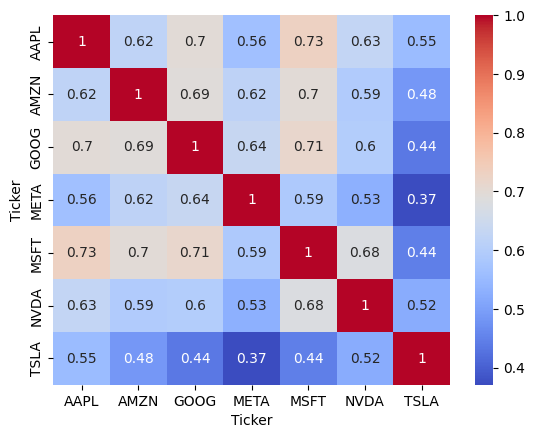

In [24]:
# calcutling the correlation matrix of the portfolio of stocks
corr_port_ret = portfolio_stock_rets.corr()

# plotting the correlation matrix of the stock portfolio in a heatmap to better visualize the correlation between stocks
sns.heatmap(corr_port_ret, annot=True, cmap = 'coolwarm')

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'GOOG'}>],
       [<Axes: title={'center': 'META'}>,
        <Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'NVDA'}>],
       [<Axes: title={'center': 'TSLA'}>, <Axes: >, <Axes: >]],
      dtype=object)

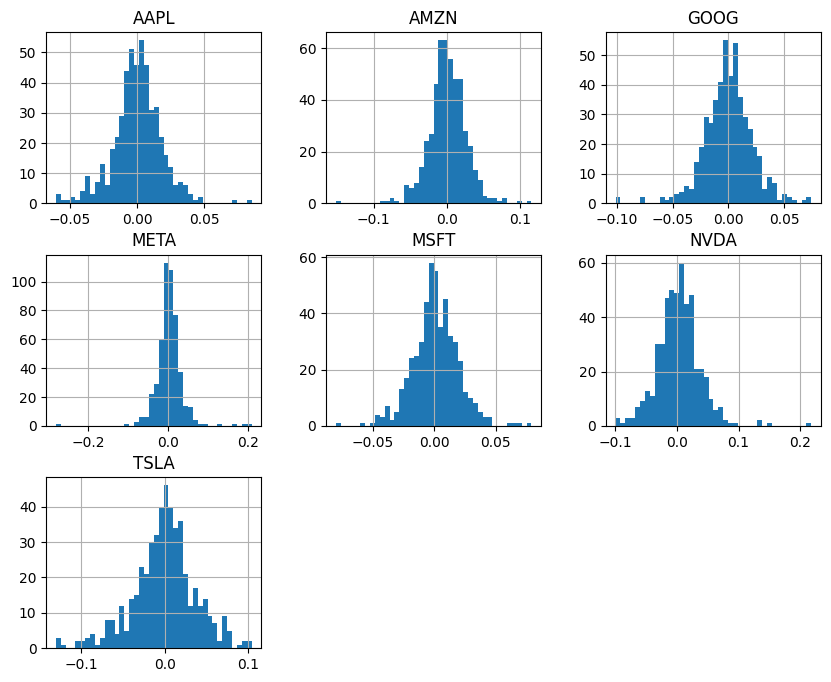

In [25]:
# getting the number of assets in our stock portfolio
num_assets = len(stock_ticks)

# getting the daily log returns of each of our assets within our portfolio
rets = np.log(portfolio_stock / portfolio_stock.shift(1))

# plotting our log reuturns to see the normal distrivutions of our returns
rets.hist(bins=40, figsize=(10, 8))


# Monte Carlo Simulation Efficient Frontier
#### credit: https://www.youtube.com/watch?v=wlaLmM_LvWg

In [26]:
#create a function method that will calculate and return us the annual returns and volatility in the form of standard deviation
def portfolioperformance(weights):
    
    # calculating annual returns of the portfolio. we take the weighted returns of each asset and sum it all up and multiply that number by 252 days
    annual_returns = np.sum(rets.mean() * weights) * 252

    # calculating volatility
    annual_covmatrix = rets.cov() * 252  # getting the annual covariance of each stock
    wght_annual_cov = np.dot(annual_covmatrix, weights) # calculating the annualized portfolio covariance of each stock has in the portfolio by getting the weighted contribution (sum product) of each asset's covariacne to the portolio
    annualized_var = np.dot(weights.T, wght_annual_cov) # calculating the annualized portfolio variance
    volatility_std = np.sqrt(annualized_var) # calculating the annualized portfolio standard deviation (volatility)

    # getting annual returns and volatility values from the function method 
    return annual_returns, volatility_std

# creating a function method that retrieves the daily risk free rate by getting the annualized risk free rate form Yahoo Finance 3-month treasury yield, converting it to daily
def riskfreerate():
    # import libraries to allow us to webscrape the value from Yahoo Finance's webpage where the 3-month treasury yield is located
    import requests
    from bs4 import BeautifulSoup

    # sending a request to Yahoo Finance api to gain access to the website in html form
    html_text = requests.get('https://finance.yahoo.com/bonds/').text

    # using beauftiful soup library to make the html readable
    soup = BeautifulSoup(html_text, 'lxml')

    # setting a variable to hold the piece of text that we are extracting from the peace of html that holds the 3-month treasury risk free rate value
    risk_free_rate_3m = soup.find('td' , class_ = 'Va(m) Ta(end) Pstart(20px) Fw(600) Fz(s)').text

    # take the text and convert it into a float number, then divide by 100 to get it in decimal formation
    risk_free_rate_3m = (float(risk_free_rate_3m.strip())) / 100

    return risk_free_rate_3m

# create a feunction method that will calculate the sharpe ratio using the risk free rate that we get from the riskfreerate function method. we have both calculation (risk free rate and sharpe ratio) seperate because we want to be able to use them in loops, this takes less work for python to calculate the sharpe ratio within the loop becuase it doesnt have to scrape and access the website every time the calculation for the sharpe ratio is looped through
def calcSharpe(returns, stdv, annualriskfreerate):

    # calculation of the sharpe ratio usin the sharpe ratio formula
    sharpe = (returns - annualriskfreerate) / stdv

    return sharpe

In [27]:
# creating a function method in order to produce a monte carlo simulation of the efficient frontier
def efficient_montecarlo():
    # storing the respective values produced in the simulation into their variables
    prets = [] # stores portfolio returns
    pvols = [] # stores portfolio volatility
    stock_weights = [] # stores portfolio stock weights
    sharpe_ratio = [] # stores portfolio sharpe ratio
    num_ports = 100000 # the number of portfolios that we want to generate within our monte carlo similation

    risk_free_rate = riskfreerate() # calculated the daily risk free rate and stores it in a variable

    # for loop in order to do the monte carlo simulation the amount of times of the number of portfolios we want to create form the simulation
    for p in range (num_ports):

        # creates random numbers for the number of assets that we have in our portfolio, this is going to be our randomly generated stock weights within our portfolio
        weights = np.random.random(num_assets)

        # normalized the weights so that the portfolio weight can equal 1, all of the stock weights that where produced randomly are adjusted so that the sum of the weights are equal to one
        weights /= np.sum(weights)

        # calculated returns adn standard deviation using the respective function method we created
        returns, std = portfolioperformance(weights)

        # calculated the sharpe ratio
        sharpe = calcSharpe(returns, std, risk_free_rate)

        #storing the values that we get from the simulation into the variables that we have created earlier. We also clean our data so that they are visualy better to interpret
        prets.append((returns*100).round(2))
        pvols.append((std*100).round(2))
        stock_weights.append((weights*100).round(0))
        sharpe_ratio.append(sharpe.round(3))

    # convert numerical data into nummpy array
    prets = np.array(prets)
    pvols = np.array(pvols)

    # craeting a dictionary out of our collected data so that we can turn it to a pandas dataframe
    portfolio = {'returns': prets,
                'volatility': pvols,
                'sharpe': sharpe_ratio}
    
    # converting te portfolio dictionary which stores our data into a pandas dataframe
    port_data = pd.DataFrame(portfolio)

    # for loop to be able to iterate through out returns dataframe column and extract their name along with an index number attached to it
    for counter,symbol in enumerate(rets.columns):

        # we then take the symbol to create a column title for a new column in the port_data dataframe and we assign the respective stock weight by iterating through our stock_weight variable that holds all of our stock weighting data and extract the respective weightings of the stock within the generated portfolio
        port_data[symbol+' Weight'] = [weights[counter] for weights in stock_weights]

    # return the dataframe as our output
    return port_data

In [28]:
# running the function method for the monte carlo simulation
port_data = efficient_montecarlo()


port_data

,returns,volatility,sharpe,AAPL Weight,AMZN Weight,GOOG Weight,META Weight,MSFT Weight,NVDA Weight,TSLA Weight
0,14.83,33.96,0.283,13.0,17.0,24.0,2.0,11.0,16.0,18.0
1,15.94,33.29,0.322,12.0,8.0,24.0,20.0,14.0,5.0,16.0
2,24.59,34.71,0.558,1.0,28.0,10.0,25.0,22.0,7.0,7.0
3,17.30,35.37,0.342,16.0,14.0,20.0,31.0,1.0,2.0,17.0
4,18.89,33.48,0.408,19.0,19.0,10.0,1.0,19.0,19.0,14.0
...,...,...,...,...,...,...,...,...,...,...
99995,26.86,34.64,0.625,16.0,12.0,16.0,18.0,9.0,21.0,7.0
99996,8.45,31.49,0.103,13.0,17.0,23.0,4.0,24.0,1.0,18.0
99997,14.77,31.53,0.303,20.0,17.0,19.0,13.0,17.0,4.0,11.0
99998,27.30,35.45,0.623,3.0,7.0,9.0,13.0,29.0,23.0,16.0


In [29]:
min_volatility = port_data['volatility'].min() # getting the portfolio that has the minimum variance
max_sharpe = port_data['sharpe'].max() # getting the portfolio that has the maximum sharpe ratio

sharpe_portfolio = port_data.loc[port_data['sharpe'] == max_sharpe] # getting all of the columns that contains the values of the portfolio that has the minimum variance
min_variance_port = port_data.loc[port_data['volatility'] == min_volatility] # getting all of the columns that contains the values of the portfolio that has the maximum sharpe ratio

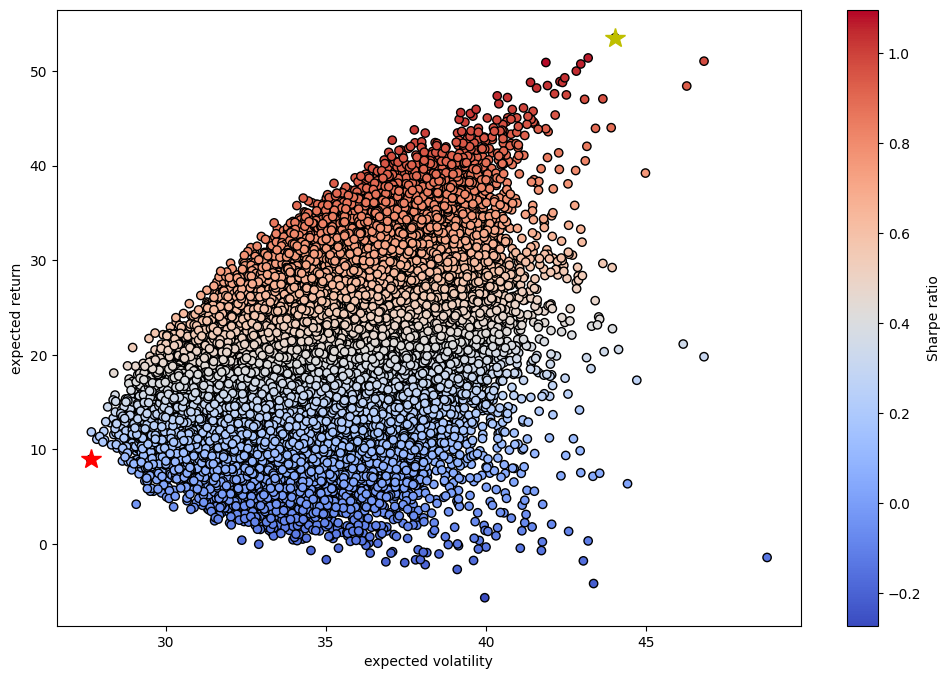

In [30]:
# plotting our data points derived form our monte carlo simulation
plt.figure(figsize=(12, 8)) # setting the size of the chart
plt.scatter(port_data['volatility'], port_data['returns'], c=port_data['sharpe'], marker='o', cmap='coolwarm', edgecolors='black') # plotting results from our monte carlo simulation
plt.plot(sharpe_portfolio['volatility'], sharpe_portfolio['returns'],'y*', markersize=15.0) # plotting results for our max sharpe ratio portfolio within our monte carlo simulation
plt.plot(min_variance_port['volatility'], min_variance_port['returns'],'r*', markersize=15.0) # plotting results for our minimum variance portfolio within our monte carlo simulation
plt.xlabel('expected volatility') # setting x-axis title
plt.ylabel('expected return') # setting y-axis title
plt.colorbar(label='Sharpe ratio') # setting colorbar title

# Efficient Frontier Using Scipy
#### credit: 
   #### Pt.1: https://www.youtube.com/watch?v=vAmlFBpipT8
   #### Pt.2: https://www.youtube.com/watch?v=Z24TOloFycM
   #### Pt.3: https://www.youtube.com/watch?v=JyIOm1oOuEk

In [31]:
# creating definition function to calculate the postive value of the sharpe ratio when trying to minimize the negative sharpe ratios in order to optimize for the maximum sharpe ratio later 
def poscalcSharpe(weights):
    import requests
    from bs4 import BeautifulSoup

    # sending a request to Yahoo api to gain access to the website in html form
    html_text = requests.get('https://finance.yahoo.com/bonds/').text

    # using beauftiful soup library to make the html readable
    soup = BeautifulSoup(html_text, 'lxml')

    # setting a variable to hold the piece of text that we are extracting from the peace of html that holds the 3-month treasury risk free rate
    risk_free_rate_3m = soup.find('td' , class_ = 'Va(m) Ta(end) Pstart(20px) Fw(600) Fz(s)').text

    # take the text and convert it into a float number
    risk_free_rate_3m = float(risk_free_rate_3m.strip())

    # the risk free rate is set to an annual rate by default. calculate the daily risk free rate as we are dealing with daily data in our pandas dataframe for our returns
    risk_free_rate = risk_free_rate_3m / 100
    
    # getting the returns and standard deviation data thats calculated from the function method
    rets, stdv = portfolioperformance(weights)
    
    # calculating negative sharpe ratio
    pos_sharpe = (rets - risk_free_rate) / stdv

    # returning the positive sharpe ratio
    return pos_sharpe

# creating definition function to calculate the negative value of the sharpe ratio to minimize the negative sharpe ratios later  in order to optimize for the maximum sharpe ratio 
def negcalcSharpe(weights):
    import requests
    from bs4 import BeautifulSoup

    # sending a request to Yahoo api to gain access to the website in html form
    html_text = requests.get('https://finance.yahoo.com/bonds/').text

    # using beauftiful soup library to make the html readable
    soup = BeautifulSoup(html_text, 'lxml')

    # setting a variable to hold the piece of text that we are extracting from the peace of html that holds the 3-month treasury risk free rate
    risk_free_rate_3m = soup.find('td' , class_ = 'Va(m) Ta(end) Pstart(20px) Fw(600) Fz(s)').text

    # take the text and convert it into a float number
    risk_free_rate_3m = float(risk_free_rate_3m.strip())

    # the risk free rate is set to an annual rate by default. calculate the daily risk free rate as we are dealing with daily data in our pandas dataframe for our returns
    risk_free_rate = risk_free_rate_3m / 100
    
    # getting the returns and standard deviation data thats calculated from the function method
    rets, stdv = portfolioperformance(weights)
    
    # calculating negative sharpe ratio
    neg_sharpe = - (rets - risk_free_rate) / stdv

    # returning the negative sharpe ratio
    return neg_sharpe

In [32]:
# optimizing the sharpe ratio, optimizing for the maximum returns for the minimun volatiltiy
def maxsharpe():
    "minimize the negative sharpe ratio by minimizing the negative sharpe ratios"
    # strict equality statement, stating that all of the summation in the weights of the portfolio are equal to one
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # for every single asset we have a bound between 0 and 1, meaning that the portfolio weight can't exceed 100% of its weight
    bounds =  tuple((0, 1) for x in range(num_assets))

    # this is the initial guess for the weights of the portfolio, we assume that all of portfolio assets are equally weighted in our portfolio
    eweights = np.array(num_assets * [1. / num_assets,])

    # utilizing the scipy optimize sub-library to minimize the negative sharpe ratio and receive the optimal portfolio for the maximum sharpe ratio given the bounds and contraints that were made
    result = sc.optimize.minimize(negcalcSharpe, eweights, method= 'SLSQP', bounds= bounds, constraints= constraints)

    # returning the results from the optimization
    return result

In [33]:
# this cell code is for testing purposes
# getting the results for hte optimization of the sharpe ratio in a varaible
mxshresult = maxsharpe()

# extracting the optimal weights and sharpe ratio from the simulation
mxshwght, mxshneg = mxshresult['x'], mxshresult['fun']

# viewing our values
print(mxshwght.round(3), mxshneg)


[0.    0.    0.    0.257 0.    0.743 0.   ] -1.2111212185488949


In [34]:
# this cell code is for testing purposes

# getting the positive value of the optimized sharpe ratio since we used negative sharpe ratio to minizze them to derive the optimal sharpe ratio.
#  we use the weightings of our asset under hte optimal sharpe ratio portfolio to derive the positive sharpe ratio
possharpe = poscalcSharpe(mxshresult['x'])

# getting the performace metrics of the optimal sharpe ratio portfolio
rett, stdvv = portfolioperformance(mxshresult['x'])

# visualizing the values that we received
print(possharpe, rett, stdvv)


1.2111212185488949 0.6455962345591544 0.4899561046995215


In [35]:
# function to only calculate the portfolio volatility. we extract this from our portfolioperformance function method that already calculates this
def portfoliovolatility(weights):
    return portfolioperformance(weights)[1]

# function method to calculate the portfolio with that minimizes for the volatility. in this case we minimize for the standard deviation since it also minimizes the variance
def minimizevariance():
    "minimizing the portfolio vairance by minimizing the portoflio weights standard deviations"

    # strict equality statement that all of the summation in the weights of the portfolio are equal to one
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # for every single asset we have a bound between 0 and 1 meaning that the portfolio weight cant exceed 100% of its weight
    bounds =  tuple((0, 1) for x in range(num_assets))

    # this is the initial guess for the weights of the portfolio, we assume that all of portfolio assets are equally weighted in our portfolio
    eweights = np.array(num_assets * [1. / num_assets,])

    # utilizing the scipy optimize sub-library to minimize for the standard deviation and recieve the optimal portfolio for the minimum volatility given the bounds and contraints that were made
    result = sc.optimize.minimize(portfoliovolatility, eweights, method= 'SLSQP', bounds= bounds, constraints= constraints)
    return result

In [36]:
# this cell is for testing purposes
# getting the results for the optimization of minimal volatility in a varaible
minvresult = minimizevariance()

# getting the optimal weights of stocks and volatility within the optimal minimum volatility portfolio
minvwght, minvshneg = minvresult['x'], minvresult['fun']

# visualing the values
print(minvwght.round(3), minvshneg)

[0.551 0.    0.047 0.    0.402 0.    0.   ] 0.26858722250783607


In [37]:
# we use the weightings of our asset under hte optimal minimal volatility portfolio to derive the positive sharpe ratio
minv_possharpe = poscalcSharpe(minvresult['x'])

# getting the performace metrics of the optimal minimal volatility portfolio
rettt, stdvvv = portfolioperformance(minvresult['x'])

# printing the values to visualize
print (minv_possharpe,rettt,stdvvv)

0.23370646700072187 0.11497057085384313 0.26858722250783607


In [38]:
# function to only calculate the portfolio returns. we extract this from our portfolioperformance function method that already calculates this
def port_ret(weights):
    return portfolioperformance(weights)[0]

# function method to calculate the efficient frontier that holds all of the data in relation to the optimal portfolio that gives you the maximized returned for the minimized risk of a specific portfolio target return
def efficientoptm(target_ret):

    # strict equality statement that all of the summation in the weights of the portfolio are equal to one and that the portfolio returns are equal to the the indicated target returns
    cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - target_ret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    # for every single asset we have a bound between 0 and 1 meaning that the portfolio weight cant exceed 100% of its weight
    bnds = tuple((0, 1) for x in range(num_assets)) 

    # this is the initial guess for the weights of the portfolio, we assume that all of portfolio assets are equally weighted in our portfolio
    eweights = np.array(num_assets * [1. / num_assets,])
    
    # utilizing the scipy optimize sub-library to minimize for the standard deviation and recieve the optimal portfolio for the minimum volatility given the bounds and contraints that were made
    # in this case we are optimizing for the given target returns that we have implemented in our contraint. so we are finding the portfolio with the minimized volatility for the given target return between our minimal variance portfolio and our maximum sharpe ratio portfolio
    frontier_val = sc.optimize.minimize(portfoliovolatility, eweights, method='SLSQP',
                                bounds=bnds, constraints=cons)
    
    # returning our data
    return frontier_val

In [39]:
# creating a function method to calculate all of our results for the efficient frontier simulation using scipy optimization library
def calculatedresults():
    
    # maximum volatiltiy portfolio
    maxsharpe_port = maxsharpe() # calculating our maximum sharpe ratio portfolio
    maxsharpe_ret, maxsharpe_std = portfolioperformance(maxsharpe_port['x']) # calculating the return and standard deviation using the max sharpe ratio portfolio's stock weightings 
    maxpossharpe = poscalcSharpe(maxsharpe_port['x']).round(3) # calculating the postive sharpe ratio, the simulation takes in negative ratios to minimize the ratio and derive the optimal max sharpe ratio portfolio
    maxsharpe_ret_round, maxsharpe_std_round = round(maxsharpe_ret*100,2), round(maxsharpe_std*100,2) # rounding the returns and standard deviation values for better interpreation
    maxsharpe_port_wght = (maxsharpe_port['x'] * 100).round(0) # assigning the optimal stock weightings of the portfolio to a variable and format it for better interpretation
    
    # minimum volatility portfolio
    minvol_port = minimizevariance() # calculating our minimal volatility portfolio
    minvol_ret, minvol_std = portfolioperformance(minvol_port['x']) # calculating the return and standard deviation using the minimal volatility portfolio's stock weightings
    minvolpossharpe = poscalcSharpe(minvol_port['x']).round(3) # calculating the postive sharpe ratio of the optimal portfolio for minimal vaariance using the stock weightings of the portfolio
    minvol_ret_round, minvol_std_round = round(minvol_ret*100,2), round(minvol_std*100,2) # better formating the returns and standard deviation numbers for better interpretation
    minvol_port_wght = (minvol_port['x'] * 100).round(0) # assigning the optimal stock weightings of the portfolio to a variable and format it for better interpretation

    # putting the calculated values of the minimum volatility and maximum sharpe ratio optimal portfolio in a dictionary to later convert it in a pandas dataframe
    optportfolio = {'returns': [maxsharpe_ret_round, minvol_ret_round],
                'volatility': [maxsharpe_std_round, minvol_std_round],
                'sharpe': [maxpossharpe, minvolpossharpe]}

    # creating a list of texts that represents the titles for the index in the pandas dataframe
    index = ['max_sharpe_ratio_values', 'min_volatility_values']
    
    # creating pandas dataframe for miminimal variance and max sharpe ratio portfolio values
    opt_port = pd.DataFrame(optportfolio, index = index)

    # for loop to be able to iterate throughout the returns dataframe columns and extract their name along with an index number attached to it
    for counter, symbol in enumerate(rets.columns):
      opt_port.loc['max_sharpe_ratio_values', symbol+' Weight'] = maxsharpe_port_wght[counter] # create a new column with the current stock symbol that is being iterated and then attach the weightings of the max sharpe ratio portfolio to the row of the column
      opt_port.loc['min_volatility_values', symbol+' Weight'] = minvol_port_wght[counter] # create a new column with the current stock symbol that is being iterated and then attach the weightings of the minimum variance portfolio to the row of the column

    # efficient frontier
    target_rets = np.linspace(minvol_ret, maxsharpe_ret, 1000) # creating an array of numbers between the minimum varaince portfolio returns and the max sharpe ratio portfolio return. this will serve as our target returns within the efficient frontier
    target_vols = [] # stores the the volatility values for our optimal portfolio based on our target returns
    target_wghts = [] # stores the the stock weightings values for our optimal portfolio based on our target returns
    target_sharpe = [] # stores the the sharpe ratio values for our optimal portfolio based on our target returns
    
    frontier_risk_free_rate = riskfreerate() # gets the risk free rate from the 3-month treasury yield annual rate

    # for loop to iterate through the array of target returns that we have stored in target_ret variable
    for target_ret in target_rets:
      frontier_val = efficientoptm(target_ret) # calculates the optimal portfolio for the given target return
      target_vol = frontier_val['fun'] # extracts the volatility value from the simulation
      target_vols.append((target_vol*100).round(2)) # appends the volatility value to our variable that holds a list of the values
      front_sharpe = calcSharpe(target_ret, target_vol, frontier_risk_free_rate) # calculated the sharpe ratio of the optimal portfolio
      target_sharpe.append(front_sharpe.round(3)) # appends the sharpe ratio to the variable that holds a list of the values
      target_wghts.append((frontier_val['x']*100).round(0)) # appends the weighting of the stocks in the optimal portfolio to the variable that holds a list of the values

    # created a dictionary that holds the respective values of the optimal portfolios given the range of target returns 
    eff_portfolio = {'returns': (target_rets*100).round(2),
                'volatility': target_vols,
                'sharpe': target_sharpe}
    
    # creating the pandas dataframe
    eff_port = pd.DataFrame(eff_portfolio)
    
    # for loop to be able to iterate throughout the returns dataframe columns and extract their name along with an index number attached to it
    for counter,symbol in enumerate(rets.columns):
      eff_port[symbol+' Weight'] = [weights[counter] for weights in target_wghts] # create a new column with the current stock symbol that is being iterated and then attach the weighting of the stock within the portfolio to the row of the column

    # returning the pandas dataframe that where created for the minimum varaince and max sharpe ratio portfolio and the efficient frontier portfolio. We also extract certain values form the minimum varaince and max sharpe ratio portfolio to plot them later in a chart
    return opt_port.T, eff_port, maxsharpe_ret_round, maxsharpe_std_round, minvol_ret_round, minvol_std_round

In [40]:
# this cell is for testing purposes
# runs the function method that calculated our optimal portfolios, returning the dataframes and other respective data that is going to be used for future charting purposes
opt_port_df, eff_port_df, maxsharpe_ret_round, maxsharpe_std_round, minvol_ret_round, minvol_std_round  = calculatedresults()


In [41]:
# visualing data values
print(maxsharpe_ret_round, maxsharpe_std_round, minvol_ret_round, minvol_std_round)

64.56 49.0 11.5 26.86


In [42]:
# viewing the dataframe for minimum variance and max sharpe ratio optimal portfolios
opt_port_df

,max_sharpe_ratio_values,min_volatility_values
returns,64.560,11.500
volatility,49.000,26.860
sharpe,1.211,0.234
AAPL Weight,0.000,55.000
AMZN Weight,0.000,0.000
GOOG Weight,0.000,5.000
META Weight,26.000,0.000
MSFT Weight,0.000,40.000
NVDA Weight,74.000,0.000
TSLA Weight,0.000,0.000


In [43]:
# viewing the dataframe for the efficient frontier target returns optimal portfolios
eff_port_df

,returns,volatility,sharpe,AAPL Weight,AMZN Weight,GOOG Weight,META Weight,MSFT Weight,NVDA Weight,TSLA Weight
0,11.50,26.86,0.234,55.0,0.0,5.0,0.0,40.0,0.0,0.0
1,11.55,26.86,0.236,55.0,0.0,5.0,0.0,41.0,0.0,0.0
2,11.60,26.86,0.238,55.0,0.0,4.0,0.0,41.0,0.0,0.0
3,11.66,26.86,0.240,55.0,0.0,4.0,0.0,41.0,0.0,0.0
4,11.71,26.86,0.242,54.0,0.0,4.0,0.0,41.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,64.35,48.82,1.211,0.0,0.0,0.0,27.0,0.0,73.0,0.0
996,64.40,48.87,1.211,0.0,0.0,0.0,26.0,0.0,74.0,0.0
997,64.45,48.91,1.211,0.0,0.0,0.0,26.0,0.0,74.0,0.0
998,64.51,48.95,1.211,0.0,0.0,0.0,26.0,0.0,74.0,0.0


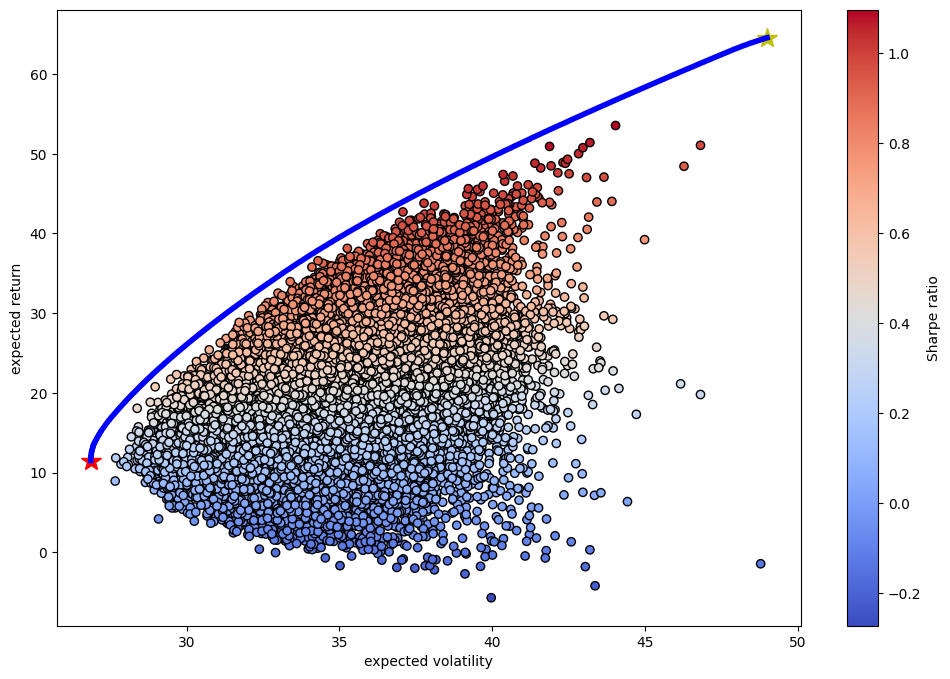

In [44]:
# plotting our data points derived form our simulations
plt.figure(figsize=(12, 8)) # setting the size of the chart
plt.scatter(port_data['volatility'], port_data['returns'], c=port_data['sharpe'], marker='o', cmap='coolwarm', edgecolors='black') # plotting results from our monte carlo simulation
plt.plot(maxsharpe_std_round, maxsharpe_ret_round,'y*', markersize=15.0) # plotting results for our max sharpe ratio optimal portfolio
plt.plot(minvol_std_round, minvol_ret_round,'r*', markersize=15.0) # plotting results for our minimum variance optimal portfolio
plt.plot(eff_port_df['volatility'], eff_port_df['returns'], 'b', lw=4.0) # plotting our efficient frontier target returns optimal portfolios 
plt.xlabel('expected volatility') # setting x-axis title
plt.ylabel('expected return') # setting y-axis title
plt.colorbar(label='Sharpe ratio') # setting colorbar title